In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from time import time
from knapsack import pbil, read_data

SEED = 41
DATA_BASEPATH = "../data/showcase/"
FILENAMES = ["uncorrelated.csv", "medium_correlation.csv", "strong_correlation.csv"]


def run_pbil_with_hyperparameters(
    total_capacity,
    items,
    population_size=300,
    num_generations=1000,
    num_best=10,
    learning_rate=0.15,
    mutation_probability=0.1,
    mutation_std=0.1,
    threshold=1e-4
):
    """
    Run the PBIL algorithm with specified hyperparameters and return the results.
    """
    best_value, representation_vector, best_values, probability_vector = pbil(
        total_capacity,
        items,
        population_size,
        num_generations,
        num_best,
        learning_rate,
        mutation_probability,
        mutation_std,
        threshold,
        True
    )
    return {
        "best_value": best_value,
        "representation_vector": representation_vector,
        "best_values": best_values,
        "probability_vector": probability_vector
    }

In [2]:
def showcase_mutation_std(filepath):
    mutation_stds = [0, 0.05, 0.1, 0.15, 0.2, 0.25]
    optimal_value, total_capacity, items = read_data(filepath)
    results = []
    for mutation_std in mutation_stds:
        random.seed(SEED)
        result = run_pbil_with_hyperparameters(
            total_capacity,
            items,
            mutation_std=mutation_std,
            mutation_probability=0.5 # to showcase change
        )
        results.append(result)

    # Plot the results
    plt.figure(figsize=(12, 6))
    for i, mutation_std in enumerate(mutation_stds):
        best_values = results[i]["best_values"]
        avg_best_values = [np.mean(gen) for gen in best_values]
        plt.plot(avg_best_values, label=f'Mutation Std: {mutation_std}')

    plt.xlabel('Generation')
    plt.ylabel('Average Best Value')
    plt.suptitle('Impact of Mutation Standard Deviation on PBIL Algorithm')
    plt.title(f"Optimal value: {optimal_value}, Total capacity: {total_capacity}")
    plt.legend()
    plt.grid(True)
    plt.show()

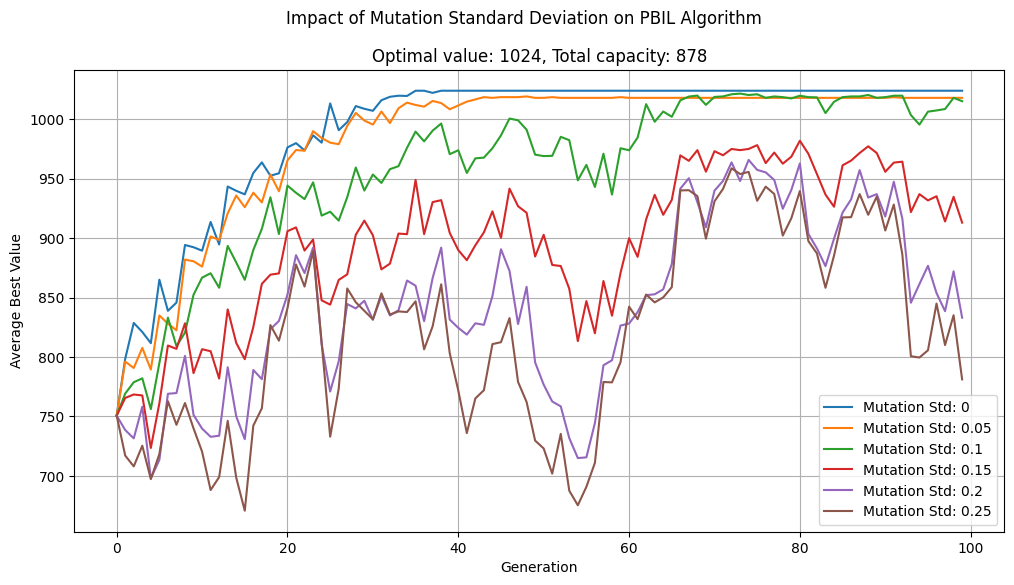

In [4]:
showcase_mutation_std("../data/small/f2_l-d_kp_20_878.csv")

In [5]:
def showcase_mutation_probability(filepath):
    mutation_probs = [0, 0.05, 0.1, 0.2, 0.25, 0.5, 0.75, 1]
    optimal_value, total_capacity, items = read_data(filepath)
    results = []
    for mutation_prob in mutation_probs:
        random.seed(SEED)
        result = run_pbil_with_hyperparameters(
            total_capacity,
            items,
            mutation_probability=mutation_prob
        )
        results.append(result)

    # Plot the results
    plt.figure(figsize=(12, 6))
    for i, mutation_prob in enumerate(mutation_probs):
        best_values = results[i]["best_values"]
        avg_best_values = [np.mean(gen) for gen in best_values]
        plt.plot(avg_best_values, label=f'Mutation probability: {mutation_prob}')

    plt.xlabel('Generation')
    plt.ylabel('Average Best Value')
    plt.suptitle('Impact of Mutation Probability on PBIL Algorithm')
    plt.title(f"Optimal value: {optimal_value}, Total capacity: {total_capacity}")
    plt.legend()
    plt.grid(True)
    plt.show()

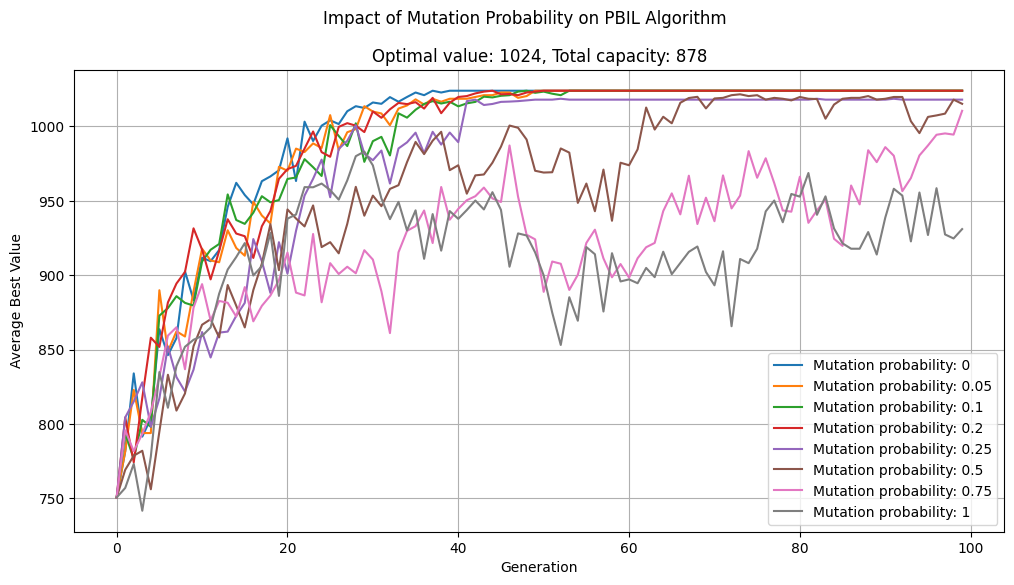

In [6]:
showcase_mutation_probability("../data/small/f2_l-d_kp_20_878.csv")

In [16]:
def showcase_learning_rate():
    learning_rates = [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 0.75, 1.0]
    fig, ax = plt.subplots(1, len(FILENAMES), figsize=(20, 5))
    plt.suptitle("Learning Rate Impact on PBIL Algorithm")

    for idx, filename in enumerate(FILENAMES):
        optimal_value, total_capacity, items = read_data(DATA_BASEPATH + filename)
        results = []

        for lr in learning_rates:
            random.seed(SEED)
            np.random.seed(SEED)
            result = run_pbil_with_hyperparameters(
                total_capacity,
                items,
                learning_rate=lr,
            )
            results.append(result)

        for i, lr in enumerate(learning_rates):
            best_values = results[i]["best_values"]
            avg_best_values = [np.mean(gen) for gen in best_values]
            ax[idx].plot(avg_best_values, label=f'LR: {lr}, Best: {results[i]["best_value"]}')
        
        ax[idx].set_title(f"{filename}; optimal value: {optimal_value}")
        ax[idx].set_xlabel("Generation")
        ax[idx].set_ylabel("Average Best Value")
        ax[idx].legend(loc="lower right")

    plt.show()

100%|██████████| 1000/1000 [00:05<00:00, 188.39it/s]


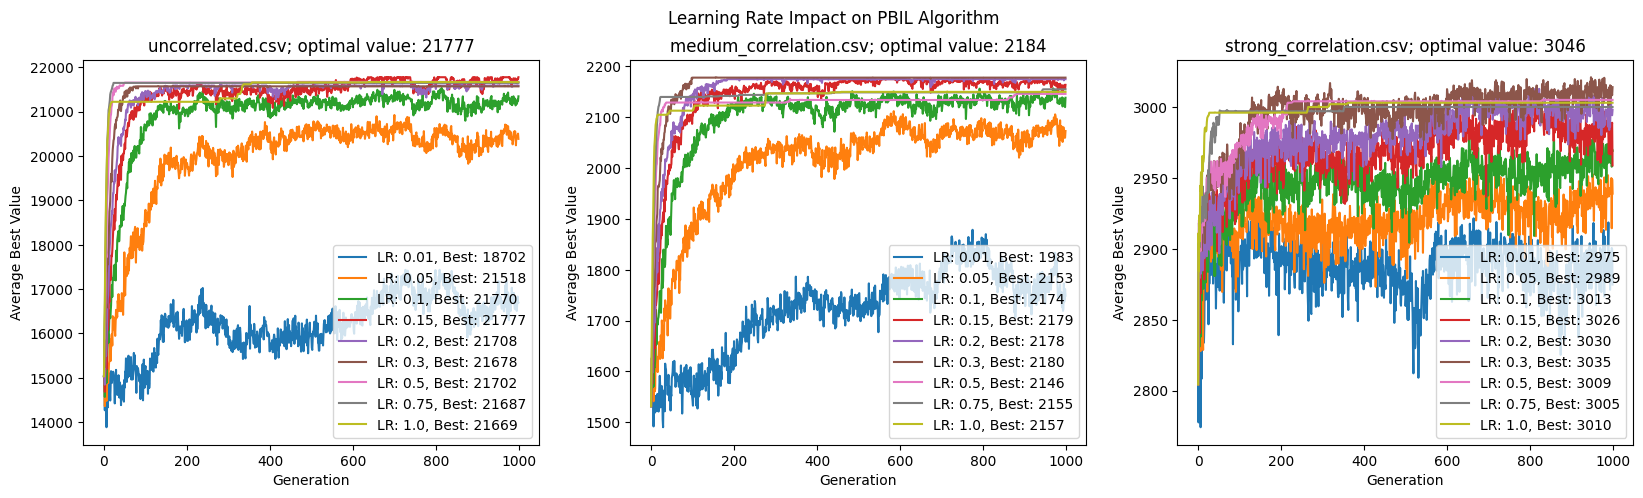

In [17]:
showcase_learning_rate()

In [43]:
def showcase_num_generations():
    all_filenames = [
        [
            "uncorrelated/knapsack_30.csv",
            "uncorrelated/knapsack_50.csv",
            "uncorrelated/knapsack_100.csv",
        ],
        [
            "medium_correlation/knapsack_30.csv",
            "medium_correlation/knapsack_50.csv",
            "medium_correlation/knapsack_100.csv",
        ],
        [
            "strong_correlation/knapsack_30.csv",
            "strong_correlation/knapsack_50.csv",
            "strong_correlation/knapsack_100.csv",
        ],
    ]
    num_generations_list = [5, 10, 50, 100, 200, 500, 1000, 2000]
    fig, ax = plt.subplots(len(all_filenames[0]), len(all_filenames), figsize=(30, 15))
    plt.suptitle("Number of Generations Impact on PBIL")

    for plot_j, correlation_filenames in enumerate(all_filenames):
        for plot_i, filename in enumerate(correlation_filenames):
            optimal_value, total_capacity, items = read_data("../data/" + filename)
            results = []

            for gens in num_generations_list:
                random.seed(SEED)
                np.random.seed(SEED)
                result = run_pbil_with_hyperparameters(
                    total_capacity,
                    items,
                    num_generations=gens,
                )
                results.append(result)

            best_values = []
            for gen_i, gens in enumerate(num_generations_list):
                avg_best_values = [
                    np.mean(gen) for gen in results[gen_i]["best_values"]
                ]
                best_values.append(f"{gens}: {results[gen_i]["best_value"]}")
                ax[plot_i][plot_j].bar(
                    gen_i,
                    avg_best_values,
                    align="center",
                )

            ax[plot_i][plot_j].set_title(f"{filename}; optimal value: {optimal_value}")
            ax[plot_i][plot_j].set_xticks(np.arange(len(num_generations_list)), best_values)
            ax[plot_i][plot_j].set_xlabel("Best Value of Each Generation")
            ax[plot_i][plot_j].set_ylabel("Average Best Value")

    plt.show()

100%|██████████| 2000/2000 [00:13<00:00, 147.75it/s]


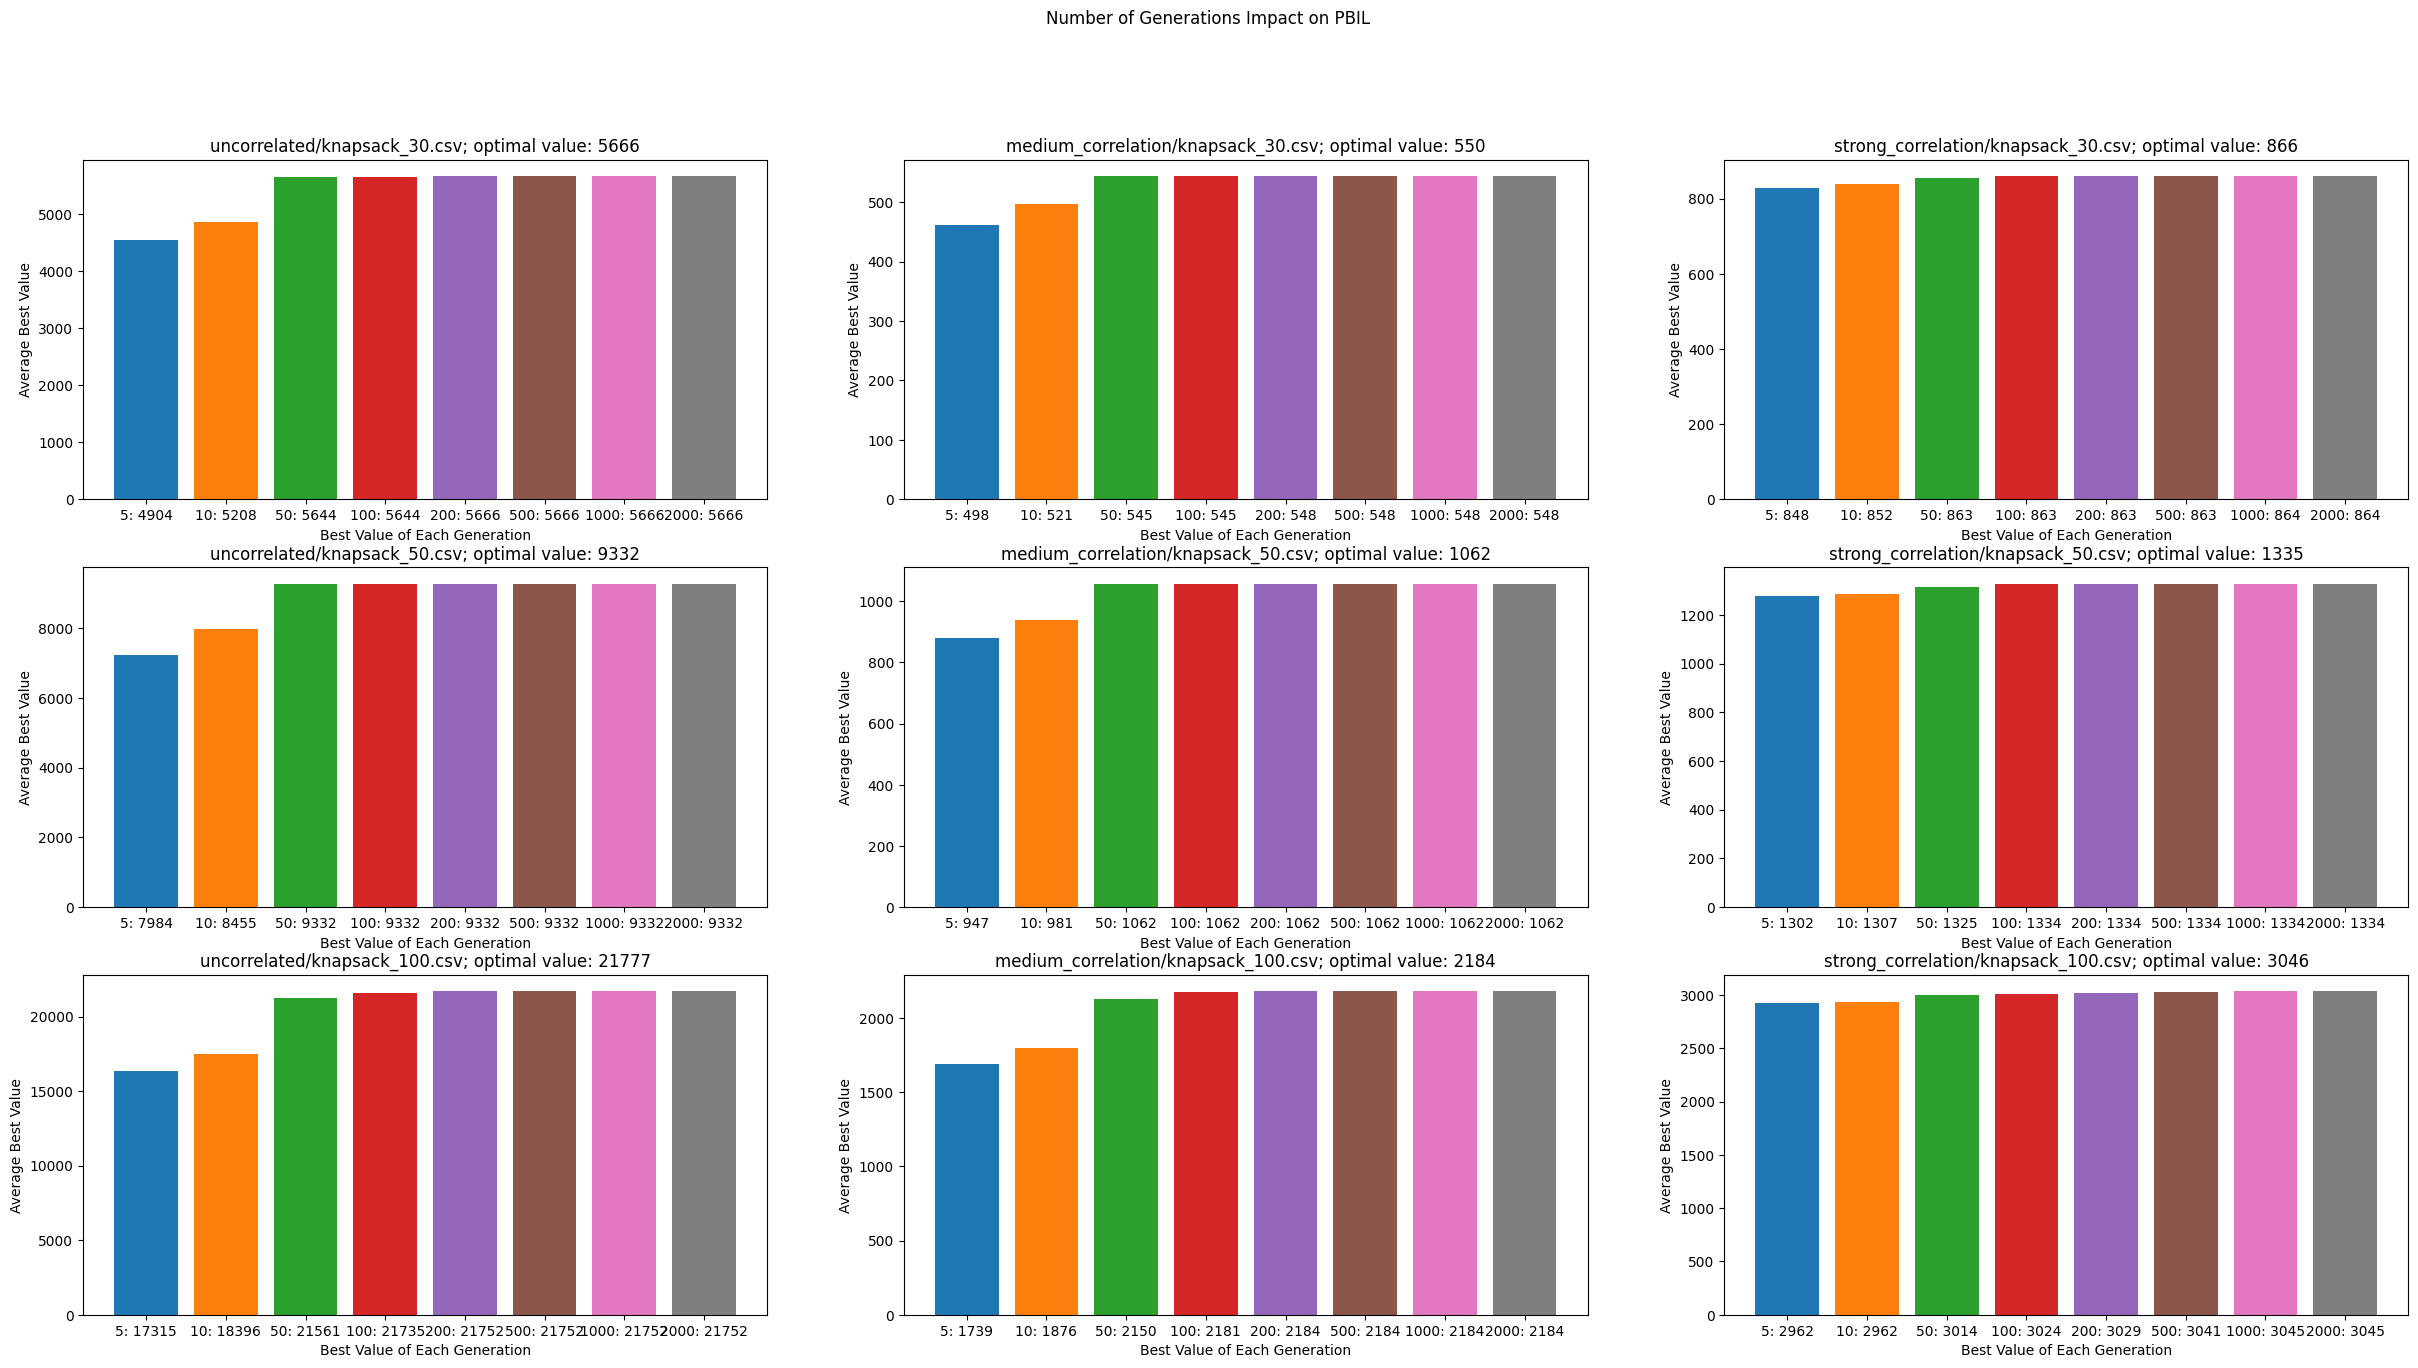

In [44]:
showcase_num_generations()

In [35]:
def showcase_population_size():
    population_sizes = [50, 100, 200, 300, 400, 500, 800, 1000]
    fig, ax = plt.subplots(1, len(FILENAMES), figsize=(20, 5))
    plt.suptitle("Population Size Impact on PBIL")

    times = []
    for idx, filename in enumerate(FILENAMES):
        optimal_value, total_capacity, items = read_data(DATA_BASEPATH + filename)
        results = []
        ts = []
        for pop_size in population_sizes:
            random.seed(SEED)
            np.random.seed(SEED)
            start = time()
            result = run_pbil_with_hyperparameters(
                total_capacity,
                items,
                population_size=pop_size,
            )
            ts.append(time() - start)
            results.append(result)
        
        times.append(ts)

        for i, pop_size in enumerate(population_sizes):
            best_values = results[i]["best_values"]
            avg_best_values = [np.mean(gen) for gen in best_values]
            ax[idx].plot(avg_best_values, label=f'Pop: {pop_size}, Best: {results[i]["best_value"]}')

        ax[idx].set_title(f"{filename}; optimal value: {optimal_value}")
        ax[idx].set_xlabel("Generation")
        ax[idx].set_ylabel("Average Best Value")
        ax[idx].legend(loc="lower right")
    plt.show()

    plt.figure()
    for i, filename in enumerate(FILENAMES):
        plt.plot(population_sizes, times[i], label=filename)
    plt.xlabel("Population Size")
    plt.ylabel("Time [s]")
    plt.suptitle("Time Complexity of PBIL Algorithm depending on Population Size")
    plt.title("Measured for 1000 iterations")
    plt.legend()
    plt.grid(True)
    plt.show()

100%|██████████| 1000/1000 [00:46<00:00, 21.62it/s]


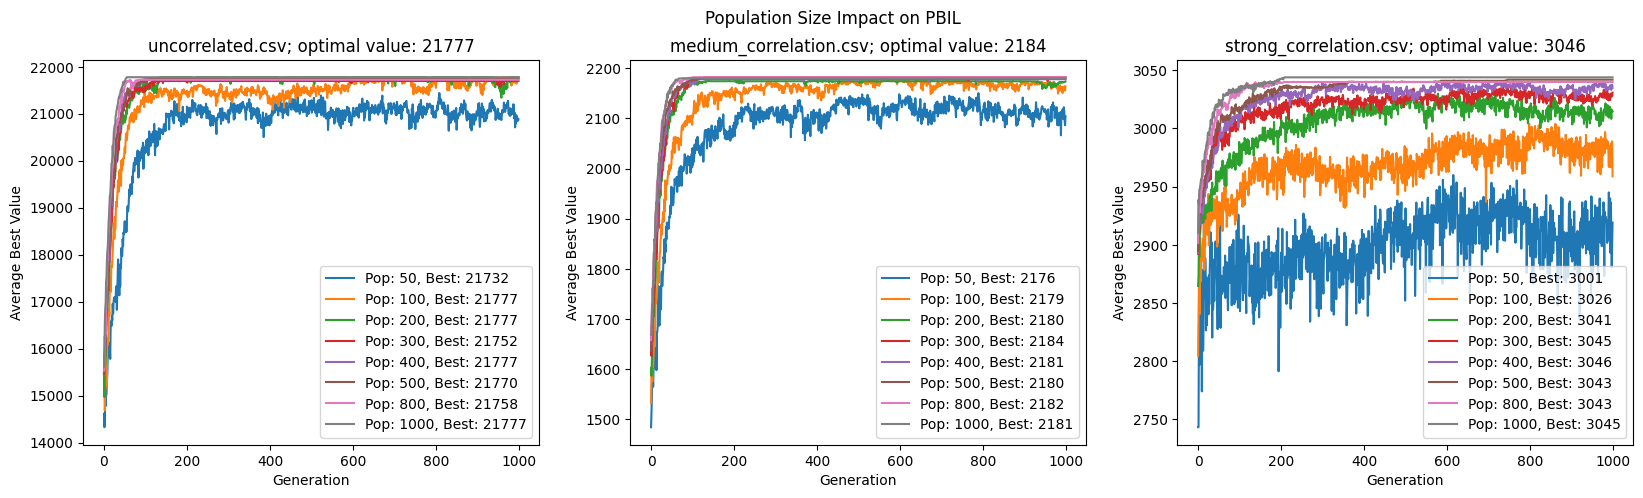

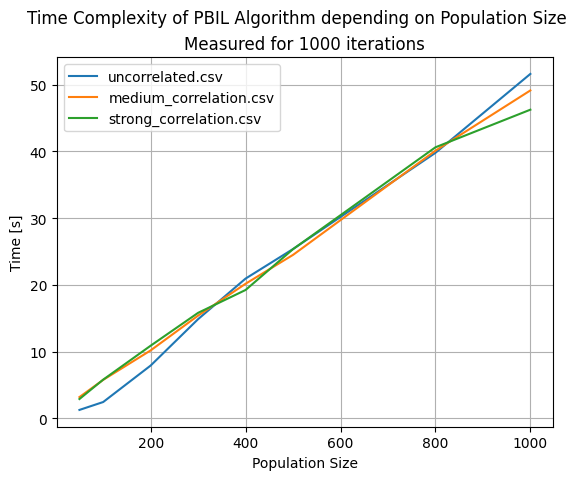

In [36]:
showcase_population_size()

In [33]:
def showcase_num_best():
    num_best_values = [5, 10, 20, 30, 40, 50, 80, 100]
    fig, ax = plt.subplots(1, len(FILENAMES), figsize=(20, 5))
    plt.suptitle("Number of Best Specimens Impact on PBIL")

    for idx, filename in enumerate(FILENAMES):
        optimal_value, total_capacity, items = read_data(DATA_BASEPATH + filename)
        results = []

        for num_best in num_best_values:
            random.seed(SEED)
            np.random.seed(SEED)
            result = run_pbil_with_hyperparameters(
                total_capacity,
                items,
                num_best=num_best,
            )
            results.append(result)

        for i, num_best in enumerate(num_best_values):
            best_values = results[i]["best_values"]
            avg_best_values = [np.mean(gen) for gen in best_values]
            ax[idx].plot(avg_best_values, label=f'Num Best: {num_best}, Best: {results[i]["best_value"]}')

        ax[idx].set_title(f"{filename}; optimal value: {optimal_value}")
        ax[idx].set_xlabel("Generation")
        ax[idx].set_ylabel("Average Best Value")
        ax[idx].legend(loc="lower right")

    plt.show()

100%|██████████| 1000/1000 [00:07<00:00, 136.04it/s]


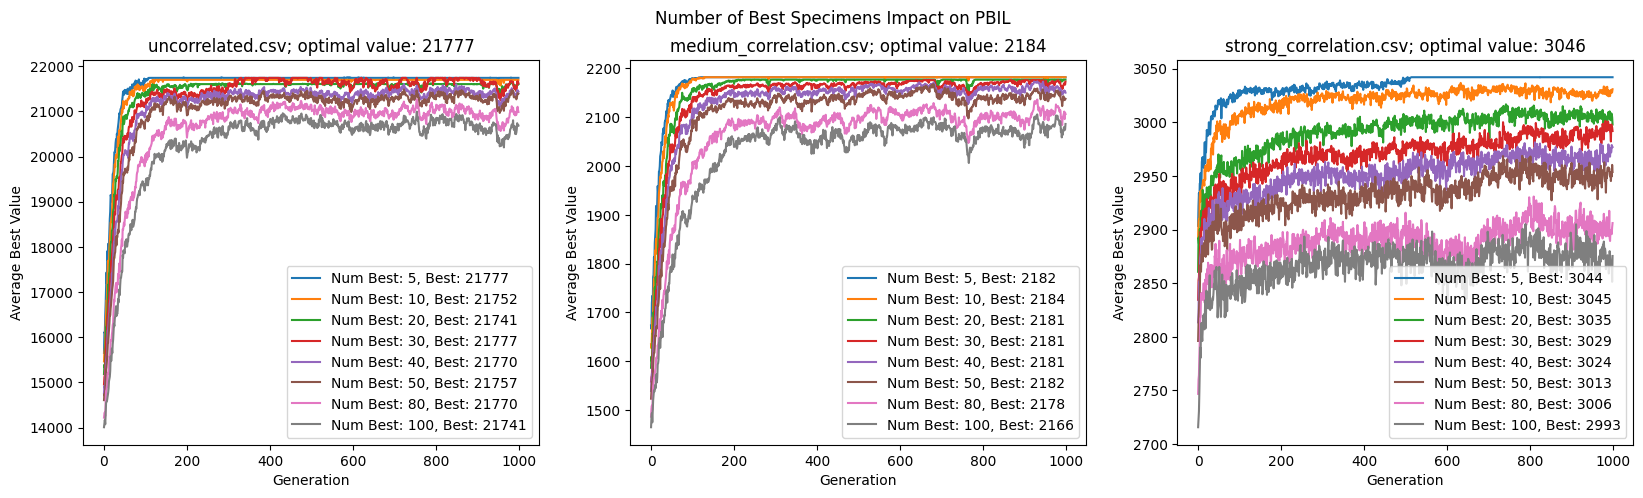

In [34]:
showcase_num_best()

In [6]:
def showcase_threshold():
    thresholds = [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 1]
    fig, ax = plt.subplots(1, len(FILENAMES), figsize=(20, 5))
    plt.suptitle("Threshold Impact on PBIL")

    for idx, filename in enumerate(FILENAMES):
        optimal_value, total_capacity, items = read_data(DATA_BASEPATH + filename)
        results = []

        for thresh in thresholds:
            random.seed(SEED)
            np.random.seed(SEED)
            result = run_pbil_with_hyperparameters(
                total_capacity,
                items,
                threshold=thresh,
            )
            results.append(result)

        for i, thresh in enumerate(thresholds):
            best_values = results[i]["best_values"]
            avg_best_values = [np.mean(gen) for gen in best_values]
            ax[idx].plot(avg_best_values, label=f'Thresh: {thresh}, Best: {results[i]["best_value"]}')

        ax[idx].set_title(f"{filename}; optimal value: {optimal_value}")
        ax[idx].set_xlabel("Generation")
        ax[idx].set_ylabel("Average Best Value")
        ax[idx].legend(loc="lower right")

    plt.show()

  0%|          | 1/1000 [00:00<00:12, 79.06it/s]


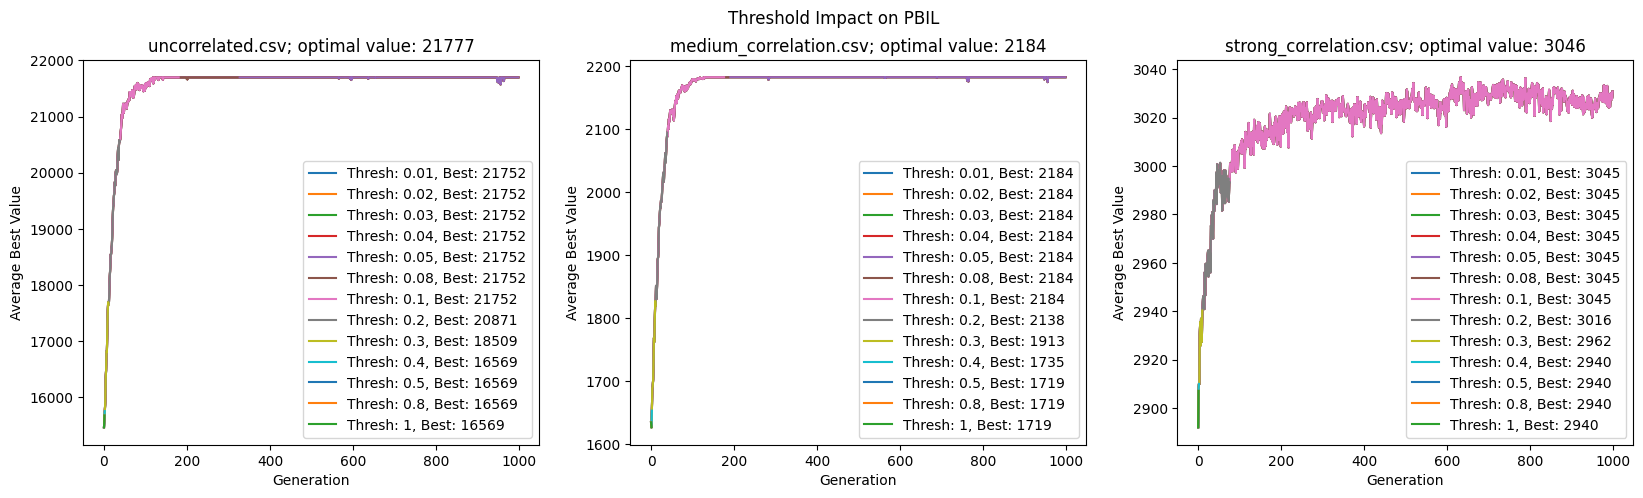

In [7]:
showcase_threshold()